In [3]:
import os
os.chdir("..")

In [4]:
import multi_agent_reinforcement_learning
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [80]:
df = pd.read_csv("data/one_actor_rl_1_mean_price.csv")
df_rew = pd.read_csv("data/one_actor_reward.csv")

In [81]:
df = df[df.columns[1::3]]
df_rew = df_rew[df_rew.columns[1::3]]

In [82]:
df

,"no-actors 1, 300 (2024-01-03 20:59) - RL_1_SAC Mean Price","no-actors 1, 200 (2024-01-03 18:53) - RL_1_SAC Mean Price","no-actors 1, 100 (2024-01-03 16:49) - RL_1_SAC Mean Price","no-actors 1, half cars (2024-01-03 07:36) - RL_1_SAC Mean Price",no-actors 1 (2024-01-03 05:46) - RL_1_SAC Mean Price
0,4.666520,4.668114,4.668948,4.668232,4.664368
1,3.309100,3.308291,3.305421,3.307786,3.309082
2,4.068444,4.069121,4.069167,4.069383,4.067086
3,5.187470,5.190798,5.193911,5.191651,5.183253
4,4.570291,4.571602,4.571431,4.571576,4.568364
...,...,...,...,...,...
4995,2.202472,2.538304,3.104802,2.820255,2.106090
4996,2.184044,2.545557,3.115351,2.822380,2.126136
4997,2.194000,2.548664,3.094935,2.823970,2.115242
4998,2.188632,2.539636,3.111476,2.821462,2.111212


In [83]:
df.columns = [300, 200, 100, 187, 187*2]

In [85]:
df

,300,200,100,187,374
0,4.666520,4.668114,4.668948,4.668232,4.664368
1,3.309100,3.308291,3.305421,3.307786,3.309082
2,4.068444,4.069121,4.069167,4.069383,4.067086
3,5.187470,5.190798,5.193911,5.191651,5.183253
4,4.570291,4.571602,4.571431,4.571576,4.568364
...,...,...,...,...,...
4995,2.202472,2.538304,3.104802,2.820255,2.106090
4996,2.184044,2.545557,3.115351,2.822380,2.126136
4997,2.194000,2.548664,3.094935,2.823970,2.115242
4998,2.188632,2.539636,3.111476,2.821462,2.111212


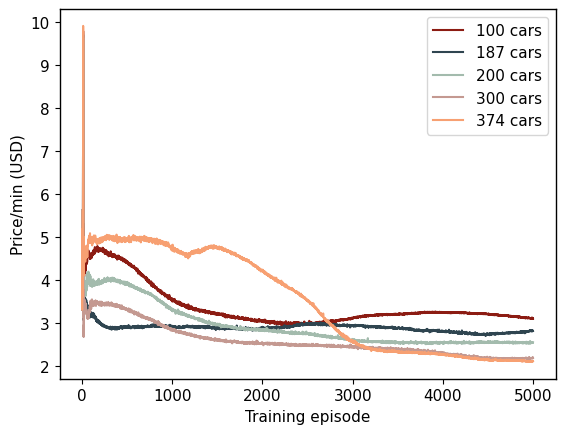

In [87]:
plt.plot(df[100], label="100 cars")
plt.plot(df[187], label="187 cars")
plt.plot(df[200], label="200 cars")
plt.plot(df[300], label="300 cars")
plt.plot(df[374], label="374 cars")
plt.legend()
plt.xlabel("Training episode")
plt.ylabel("Price/min (USD)")
plt.savefig("./figs/mean_price_development")
plt.show()

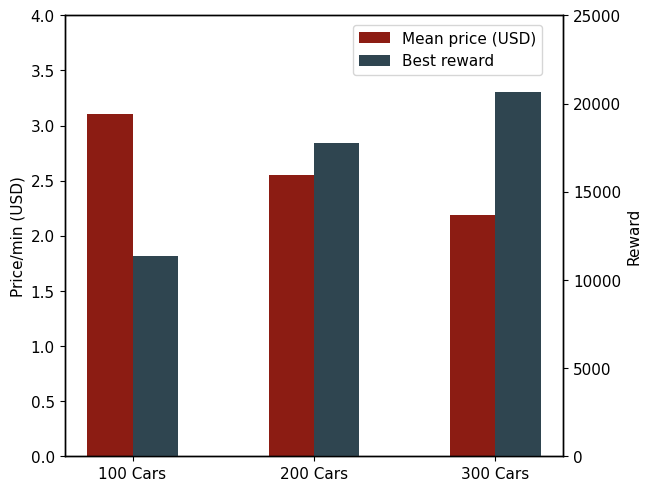

In [77]:
fig, ax = plt.subplots(layout="constrained")
labs = ["Price/min (USD)", "Reward"]
ax2 = ax.twinx()
x = np.arange(len(df.columns))
width = 0.125
b1 = ax.bar(x-width, df.iloc[-1].values[::-1], width*2, label = "Mean price (USD)")
b2 = ax2.bar(x+width, df_rew.iloc[-1].values[::-1], width*2, label="Best reward", color="#2F4550")
plt.xticks(x, ["100 Cars","200 Cars","300 Cars"], rotation=0)
ax.set_ylabel("Price/min (USD)")
ax.set_ylim(0,4)
ax2.set_ylim(0,25000)
ax2.set_ylabel("Reward")
b = b2+b1
labs = [l.get_label() for l in b]
fig.legend(bbox_to_anchor=(0.85, 0.975))
plt.savefig("./figs/last_price_and_reward")
plt.show()

In [76]:
df_rew.iloc[-1]

no-actors 1, 300 (2024-01-03 20:59) - Best Reward    20674.895639
no-actors 1, 200 (2024-01-03 18:53) - Best Reward    17746.003455
no-actors 1, 100 (2024-01-03 16:49) - Best Reward    11337.082398
Name: 4999, dtype: float64

In [5]:
data_price_vs_demand = {
    "overflow_lost_demand": [611, 344, 350, 169, 110],
    "mean_price": [3.104, 2.549, 2.815, 2.19, 2.112],
}

In [7]:
df_price_demand = pd.DataFrame(data_price_vs_demand)

In [8]:
df_price_demand.index = [100, 200, 187, 300, 374]

In [11]:
df_price_demand

,overflow_lost_demand,mean_price
100,611,3.104
200,344,2.549
187,350,2.815
300,169,2.190
374,110,2.112


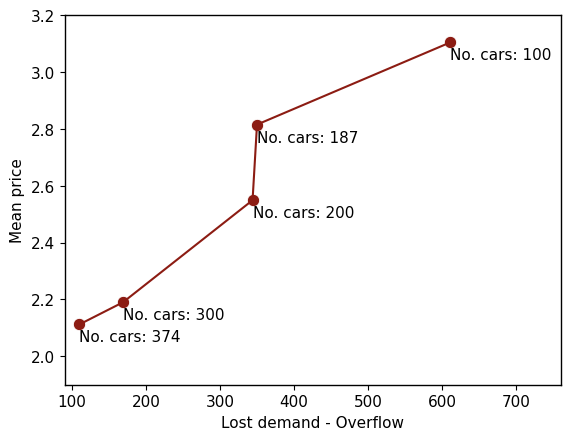

In [53]:
sns.lineplot(x="overflow_lost_demand", y="mean_price", data=df_price_demand)
sns.scatterplot(x="overflow_lost_demand", y="mean_price", data=df_price_demand, s=80)
for i in range(df_price_demand.shape[0]):
    plt.text(df_price_demand.overflow_lost_demand.iloc[i], df_price_demand.mean_price.iloc[i]-0.06, f"No. cars: {df_price_demand.index[i]}")
plt.xlabel("Lost demand - Overflow")
plt.xlim(90, 760)
plt.ylim(1.9, 3.2)
plt.ylabel("Mean price")
plt.show()